# BERT Tutorial

This tutorial is meant to teach the usage of BERT. The task at hand will be sentiment analysis of movie reviews. We will be following the [official tutorial](https://www.tensorflow.org/text/tutorials/classify_text_with_bert) from tensorflow which is one of the main ways we can use BERT to solve problems, along with pytorch. BERT and transfomer technology in general has been a revolution in natural language processing (NLP) so it is very important to understand how it works to take advantage of its capabilities.

## Review of other methods in NLP

There has been astonishing progress made in the field of natural language processing. If you used a free translation software 10 years ago and compare that to something like [DeepL](https://www.deepl.com/en/translator) or [Google translate](https://translate.google.com/)'s performance today, this should tip you off that the field has seen some large changes. We know that machines work in numbers, so our natural language has to somehow be coded this way for  computers to process. How do we do this with language? There have been several popular ways:

### Bag of Words
Probably the most popular still today is the Bag of Words model (BoW). While it is a bit crude, it is simple which is extremely attractive while other models take a long time to understand and set up. The basic logic of this model is that texts are based around keywords which are most indicative of their meaning. A vector is created which has the same length as the total number of unique tokens in the text. For example, if all texts in the sample include 50 unique words and 5 unique punctuation characters, the vector will have a length of 55 with each position in the vector indicating whether a single word or piece of punctuation is present in that observation of the text.  

As you could probably imagine, this means that large datasets would have very large vectors which can be problematic. To prevent this, stop words are removed (and, the, a, but) and word inflections are dropped by either stemming or lemmatization (acts, acting, acted all become act). We can also drop words that appear too many or too few observations as they would probably not contribute much to the model's predictive power.

Even after doing this, the problem of large dimensionality still often remains a curse for this model. Another very large drawback is the loss of context for words in terms of their position in the sentence. We can partially solve this by not only considering the presence of a word, but also word pairs or in sets of three. This is called n-grams (with n being the number of neighbors to consider). For example, in a 2-gram model, the observation "I like cats." would generate a position in the vector for "I", "like", "cats", "I like", "like cats". We can then drop instances that are too common or too rare as before.

Even n-grams cause a loss of information which could cause critical problems during analysis. As such, BoW does have pretty large flaws due to its simplicity. Nevertheless, it remains a very popular model.

### Long Short-Term Memory Networks
Another popular model is the version of a recurrent neural network (RNN) called long short-term memory (LSTM). Instead of using a vector which indicates the presence of a token, texts are preprocessed into sequences so word order now has an importance. These networks are able to optimize based on looking at these sequences (they're also great for time series data in this way), and considering the relations of words to one another based on what appears next in sequence. The drawback with this is that they normally only consider tokens which proceed. Bidirectional LSTMs solve this problem by looking at proceeding tokens then after at preceding tokens in the sequence. However, it still does this in separate steps. A good method to unify these steps to truly learn the "meaning" of a sentence has been lacking in NLP.

### Embeddings
Do words have some hidden characteristics that can be extracted? Think of what we'd need to somehow extract for a computer to perform these operations correctly:
- "Canada" + "capital" = "Ottawa"
- "man" - "old" = "boy"
- "computer" + "portable" = "laptop"

If this is possible, how could we create some kind of latent representation of the meaning of not only words, but sentences and whole documents too? It may be a surprise, but this has been done and it can massively help the performance of NLP processes.

One of the best examples of it is the [Global Vectors for Word Representation or GloVe](https://nlp.stanford.edu/projects/glove/). It is trained to learn the co-occurence of words in an extremely large number of texts. Through this process, the Stanford team was able to create a set of embeddings that represent the latent features of words. 

As these representations are numerical, they can be used in any machine learning algorithm in an attempt to solve the problem at hand. Creating smart ways to combine individual word embeddings or specializing word embeddings to a specific domain could be helpful for the task. We can then use thes embeddings as regular numerical features in machine learning algorithms.

## What is BERT?

Bidirectional Encoder Representations from Transformer or BERT is a language model which, similar to other transformer methods like GPT-3, has shown to be most promising in capturing the meaning of text. Not only is it more accurate than previous methods, it can be used in several different ways to complete multiple NLP tasks.

It works on the basis of transformers and attention mechanisms. Put plainly, each piece of text is broken down into tokens to be processed by the model. Tokens include things like words, numbers and punctuation (non-alphanumeric characters). Through training, BERT learns the association that tokens have with one another by looking at their proximity to other tokens in sample text. In the end, after being pre-trained for hours on we consider now to be very powerful processors, new text can be fed into the model and it can ascertain meaning from it. 

BERT is trained two ways: next sentence prediction (NSP) and masked language modeling (MLM). In the first task, BERT shuffles sentences and learns which ones follow the other. In the second task, BERT hides a random token and gets trained on what it should be. The fascinating part of this model is its ability to learn the context of words in both directions, something that was hard for previous NLP models to do. 

The text gets represented in BERT in a very abstract form called an embedding vector. This vector for BERT is of a fixed length of 768, so no matter how long the text is, the representation in an embedding will always be the same size. What do each of these values in the vector mean? We can't be 100% sure. They are some way BERT has found to represent the meaning of the text in numeric form. The best we can do is to check the similarity of vectors using a metric (for example, cosine similarity) to try to determine what in the vector changed.

There are [many tasks](https://huggingface.co/transformers/task_summary.html) that BERT can solve:
- Sequence classification (classify a sequence of text, eg. positive or negative)
- Extractive answering (locate the answer to a question in a text)
- Language modeling (learn the relations of words given sample text, eg. financial texts)
- Text generation
- Name entity recognition (NER, locate proper nouns and classify them)
- Summarization
- Translation 

Our goal will be to take sequences of text and determine if they are positive or negative, so our task is sequence classification. For this purpose, we could use two methods to try to solve the task:
- Directly use BERT for the supervised task
- Extract embeddings from BERT and use those as features in another model

The first method involves using BERT directly to solve a task. This is also often called transfer learning if we start applying BERT to a task that it was not trained on in the first place. 

In the second method, we take advantage of the pre-trained BERT models only to transform our text into numeric features for future machine learning tasks. In this way, we can add more features if we would like as well. For example, if we were trying to model stock volatility and we wanted to use news reports and macroeconomic variables like the leading index as inputs, then we could extract embeddings, throw in our other numeric variables then use it all as inputs into a neural network.



# Practical example of BERT

## Install transformers
Unlike many other libraries, Colab does not have the transformers package pre-installed. You will have to install it every time that you start Colab again. This is the package where you will find most of the critical tools for BERT including the pre-trained models and tokenizer.

In [ ]:
pip install -q -U tensorflow-text

     |████████████████████████████████| 4.3MB 4.3MB/s 


In [ ]:
pip install -q tf-models-official

     |████████████████████████████████| 1.6MB 4.3MB/s 
     |████████████████████████████████| 645kB 24.6MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 358kB 30.1MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 38.2MB 83kB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
     |████████████████████████████████| 686kB 28.3MB/s 
     |████████████████████████████████| 215kB 40.5MB/s 


## Import libraries
Now that you have the transfomers library on hand, it will be necessary to import it and the rest of the libraries that you will need in the task. Here we will need tensorflow, pandas, OS and shutil for basic tasks and also specific parts of the transformers package for BERT.

In [1]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub # for BERT models
import tensorflow_text as text
from official.nlp import optimization  # for AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

ModuleNotFoundError: ignored

## Load and set up the dataset

In this task, we will be using the IMDB reviews dataset. This dataset includes 50,000 IMDB reviews of movies. 25k are allocated for training and another 25k for testing. These reviews are labelled positive or negative. It will be our model's task to read a new review and determine which sentiment it projects. There are an additional 50,000 unlabelled reviews, but since this is a supervised learning task, we will be discarding these.

In [ ]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

df = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

df_dir = os.path.join(os.path.dirname(df), 'aclImdb')
X_train_dir = os.path.join(df_dir, 'train')
X_test_dir = os.path.join(df_dir, 'test')

# we only need labeled data (data for supervised learning), so we can remove the unsupervised folder
remove_dir = os.path.join(X_train_dir, 'unsup')
shutil.rmtree(remove_dir)

84131840/84125825 [==============================] - 5s 0us/step


BERT is going to take up a lot of processing power. It is highly advisable to organize your data into batches so that the amount of data that you are working with is manageable. For now, we will set the size of the batches of data that we will take to 32. You can experiment with this number when working with the program for later tasks.

In [ ]:
batch_size = 32

We will first organize the dataset a little to make it more useful for our task. As with all machine learning tasks, this part is likely going to be the most tedious in you to set up for your own projects. However, ensuring that your data is clean and makes sense is absolutely critical for the next step which is feeding it into the model.



This data only comes with a train and a test set. In deep learning, it is very useful to have a validation set as well. The machine will be trained using data on the training set, performance will be checked on the validation set. Finally, the test set, which is completely new to the model, will give us a final evaluation of the model's performance. Let's first create this validation set so that we can check our model the conventional way with an 80-20 split on the training set.

Note that the function [prefetch](https://www.tensorflow.org/guide/data_performance#prefetching) is just used to prepare the data as the machine would expect to receive it. It is normally used to make sure that the next batch of data is ready for use.

In [ ]:
# set seed for reproducibility in train-test split
seed = 888

# Create the pre-processing train df and create a seperate subset training only
X_train_raw = tf.keras.preprocessing.text_dataset_from_directory(
    X_train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

X_train = X_train_raw.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
# Note: AUTOTUNE tracks the time spent in each operation, these times can be fed into the optimization algorithm

# Take the validation data subset for processing
X_val = tf.keras.preprocessing.text_dataset_from_directory(
    X_train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

X_val = X_val.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Prepare the test data for processing
X_test = tf.keras.preprocessing.text_dataset_from_directory(
    X_test_dir,
    batch_size=batch_size)

X_test = X_test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


Let's take a quick look at three reviews to understand our data a bit better. We see that they are labeled and quite detailed. Do you agree with their labels? We see that label 1 corresponds with positive and 0 with negative. 

In [ ]:
# Get classes
class_names = X_train_raw.class_names

for text_batch, label_batch in X_train.take(1):
  for i in range(3):
    print(f'Review: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label} ({class_names[label]})')

Review: b'I remember stumbling upon this special while channel-surfing in 1965. I had never heard of Barbra before. When the show was over, I thought "This is probably the best thing on TV I will ever see in my life." 42 years later, that has held true. There is still nothing so amazing, so honestly astonishing as the talent that was displayed here. You can talk about all the super-stars you want to, this is the most superlative of them all!<br /><br />You name it, she can do it. Comedy, pathos, sultry seduction, ballads, Barbra is truly a story-teller. Her ability to pull off anything she attempts is legendary. But this special was made in the beginning, and helped to create the legend that she quickly became. In spite of rising so far in such a short time, she has fulfilled the promise, revealing more of her talents as she went along. But they are all here from the very beginning. You will not be disappointed in viewing this.'
Label : 1 (pos)
Review: b'I\'ve seen a lot of movies and 

## Preprocessing text for BERT

Now we get to a critical step with using BERT: determining which version is needed. According to the type of BERT that we will be using, we will need to pre-process our text accordingly. We will now explore what BERT does in the pre-procesing state so that you can see the inputs of the model.

You can explore a [large list of versions of BERT here](https://huggingface.co/transformers/pretrained_models.html). These pretrained versions of BERT differ mainly in size and/or the topics of text. As you can imagine, different words have very different meanings if we change the context. For example, while a liability may be a negative word in a general context, it is relatively neutral in the world of finance. As such, using specific versions of BERT can sometimes help with the performance of your model, though this is not always the case. It is a very good idea to test several versions of BERT for your purposes to see which one is optimal for your situation.

For our purposes, we will used a **small uncased BERT**. Here, uncased means that BERT will ignore capitalization and small means that BERT will only take shorter inputs. There are many more versions of BERT to try, so take a quick look through the options on the huggingface library to see if there are any more that suit your purposes.

In [ ]:
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3, Total size: 1.96MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'.


Now let's take a look at how pre-processing stages transform a text input. We start with a simple fabricated review. We see that BERT preprocessing will generate several values for this text: an input type ID, an input word ID and an input mask.

BERT is trained two ways: next sentence prediction (NSP) and masked language modeling (MLM). In the first task, sentences get shuffled and BERT must determine if it is shown sentences in the correct order or not. In the second task, BERT hides a random token and gets trained on what it should be. Through these two steps, BERT gets an idea of the meaning of words in a sentence-level and broader context.

When we look at `input_word_id`'s shape, we see that it is a vector which has a length of 128. BERT in general will truncate all texts to 512 tokens, however small BERT has a limit of 128 tokens. So, it is important to pay attention to the lengths of texts which the model will receive as your model may ignore a large part of them.

BERT has already encountered most words that will be important for classification through its pre-training. Each of these words were given an ID so that their meaning (embedding) can be easily looked up. We see the first 12 IDs of the words that are in our text corresponding to each token we input. Was the number of non-zero tokens what you expected? You may have only anticipated the following tokens: `'hated', 'every', 'minute', 'of', 'it', '.'`. Why do we have an extra 2 tokens? BERT automatically adds tokens to indicate the beginning and end of a sentence as well. The rest of the sequence will be 0s as padding to keep the input length the same which is necessary for mathematical convenience.

So you understand the other parts of a BERT preprocessor output, `input_mask` elements contain 1 if the word ID is not a padding value and 0 for padding. Lastly, `input_type_ids` can distinguish if the input contains multiple segments.

In [ ]:
example_text = ['hated every minute of it.']
example_preprocessed = bert_preprocessor(example_text)

print(f'Shape of input_word_ids: {example_preprocessed["input_word_ids"].shape}')
print(f'First 12 input_word_ids: {example_preprocessed["input_word_ids"][0, :12]}')
print("")
print(f'First 12 elements of input_mask: {example_preprocessed["input_mask"][0, :12]}')
print(f'First 12 elements of input_type_ids: {example_preprocessed["input_type_ids"][0, :12]}')

Shape of input_word_ids: (1, 128)
First 12 input_word_ids: [ 101 6283 2296 3371 1997 2009 1012  102    0    0    0    0]

First 12 elements of input_mask: [1 1 1 1 1 1 1 1 0 0 0 0]
First 12 elements of input_type_ids: [0 0 0 0 0 0 0 0 0 0 0 0]


# Load a BERT model

Now that we have pre-processed our text, we are ready to put it into a BERT model! We must first choose the corresponding model which fits with our pre-processed text or we may encounter an error. For example, if we preprocessed our text with regular BERT pre-processing, the length of sequences would be much higher than our current example with small BERT is designed to handle.

In [ ]:
bert_model = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1')
example_bert_results = bert_model(example_preprocessed)

INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1, Total size: 115.55MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'.


Just as we looked at the outputs for pre-processing, let's now also look at what the BERT model outputs. There are three major parts of this output to explore: `sequence_output`, `pooled_output` and `encoder_outputs`.

The first is the `sequence_output`. It represents each individual token in the context in which it appears. BERT will try to determine which homonym is being used and the correct embedding which corresponds with it. For example, the "chair" of the committee and the "chair" in the room should theoretically be represented by different embeddings and BERT will recognize which to use by the context. The shape of this figure is [no. samples, sequence length, embedding size]. Using this representation of the text, you can then choose how to pool meanings from the text together on your own. However, the next output simplifies this task.

In [ ]:
print(f'Shape of sequence_output:{example_bert_results["sequence_output"].shape}')
print(f'First 12 sequence_output values:{example_bert_results["sequence_output"][0, :12]}')

Shape of sequence_output:(1, 128, 512)
First 12 sequence_output values:[[-4.60336387e-01  4.33847487e-01  1.18683994e-01 ... -9.53514993e-01
   7.37923205e-01 -6.43590450e-01]
 [-5.87142050e-01  3.16169351e-01  9.60818768e-01 ... -5.75265288e-01
  -8.11677992e-01 -1.82853326e-01]
 [-1.07364058e+00  6.57025933e-01  1.46334797e-01 ... -7.22161353e-01
  -4.58198398e-01 -6.60157740e-01]
 ...
 [-1.71589270e-01 -1.15068585e-01  1.20160602e-01 ...  3.12618911e-04
   2.55718857e-01 -2.88308144e-01]
 [-1.27909139e-01  2.15944901e-01 -1.25321209e-01 ... -1.68895349e-02
   4.44979668e-01 -1.68881983e-01]
 [ 9.95172337e-02  4.62705642e-02 -9.97777134e-02 ...  3.77714932e-02
   7.97547281e-01 -2.85572946e-01]]


If you want to use the optimal way BERT engineers decided to pool the output of each individual token in the text input, you can use the default `pooled_output`. With this, the entire text is converted into a single vector-style embedding. It will have a shape of [no. samples, embedding size]. This can be one of the more useful outputs if you would like to use these embeddings then in any machine learning algorithm to perform a classification task. Or, we can continue with BERT.

In [ ]:
print(f'Shape of pooled_output:{example_bert_results["pooled_output"].shape}')
print(f'First 12 pooled_output values:{example_bert_results["pooled_output"][0, :12]}')

Shape of pooled_output:(1, 512)
First 12 pooled_output values:[ 0.9987048  -0.33625588  0.3009688   0.5842965   0.18947738  0.9930429
  0.9994944  -0.9786831  -0.47437972 -0.99929345 -0.19990227 -0.98462075]


The last output of BERT are the `encoder_outputs`. They are all of the interim activations of the transformer blocks in BERT. It has a size of [no. samples, sequence length, 1024] with the last sequence being the `sequence_output`. If you would like to use one of the intermediary steps or inspect how BERT is coming up with a specific sequence output, this could be useful.

## Build the classifier
Now we will stack some layers to create a classifier model. We will use:
- an input layer which receives the raw text
- a layer to preprocess the text for the BERT encoder
- an encoding layer which returns BERT outputs
- a dropout layer to prevent overfitting
- a final dense layer for the final classification

In [ ]:
def build_classifier_model():
  # create input layer
  input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='input text')
  # add preprocessing layer and input text
  preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3', name='preprocessing')
  encoder_inputs = preprocessor(input_layer)
  # add encoding layer and feed preprocessed text into layer
  encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1', trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  # take the pooled output and apply a dropout layer to it to prevent overfitting
  pooled = outputs['pooled_output']
  pooled = tf.keras.layers.Dropout(0.1)(pooled)
  # create output layer which is the final classifier
  pooled = tf.keras.layers.Dense(1, activation=None, name='classifier')(pooled)
  return tf.keras.Model(input_layer, pooled) 

Let's instantiate a model and test it quickly with the example text that we wrote earlier. Remember that the model isn't trained yet, so the first time that we run this, it may not be too accurate. We can try running it again after the training process and see if accuracy improves. Remember that if the model predicts close to 1, it is predicting that the text is positive.

In [ ]:
classifier_model = build_classifier_model()

bert_raw_result = classifier_model(tf.constant(example_text))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.64043146]], shape=(1, 1), dtype=float32)


Now it's time to set up how we will be optimizing the model and evaluating its performance. The loss function is used for optimization. This is the function that will get minimized by the optimizer. We will need [binary cross entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) because we have two classes. If we had more, we would need to use [categorical cross entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).

A metric is used to judge the performance of your model. This is only for the analyst to observe and has nothing to do with the optimization process. We will be using [binary accuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy) to judge this model's performance.

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

# Setting up meta parameters

BERT usually gets trained for less epochs than traditional deep learning models. Depending on your task and system abilities, you can of course experiment with adding more epochs to see how it affects the model's performance. 

`steps_per_epoch` is the total number of steps (batches of observations) to yield from generator before declaring one epoch finished and starting the next epoch. We will set his equal to the cardinality (the unique items per column) as recommended by tensorflow.

We will keep our learning rate at the highest level for the first 10% of training steps then it will follow a linear decay. According to the paper on BERT, you can also try learning rates of 5e-5 and 2e-5 if you'd like to experiment, but these seem to be best for fine-tuning BERT.

Lastly, for an optimizer, AdamW will be used, which is Adaptive Movements with weight decay (instead of regular Adam which is based on moments).

In [ ]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(X_train).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5 # Best options for BERT: 5e-5, 3e-5, 2e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

INFO:absl:using Adamw optimizer
INFO:absl:gradient_clip_norm=1.000000


Now that we have all of these set, we can compile the model with them.

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

Finally we can fit the model! Let's save each epoch's information in a variable called history. By default, our model will display its training progress so we can monitor its performance.

In [ ]:
history = classifier_model.fit(x=X_train,
                               validation_data=X_val,
                               epochs=epochs)

Epoch 1/5
625/625 [==============================] - 291s 455ms/step - loss: 0.4778 - binary_accuracy: 0.7506 - val_loss: 0.3918 - val_binary_accuracy: 0.8266
Epoch 2/5
625/625 [==============================] - 279s 447ms/step - loss: 0.3282 - binary_accuracy: 0.8557 - val_loss: 0.4097 - val_binary_accuracy: 0.8438
Epoch 3/5
625/625 [==============================] - 279s 446ms/step - loss: 0.2454 - binary_accuracy: 0.8994 - val_loss: 0.4498 - val_binary_accuracy: 0.8352
Epoch 4/5
625/625 [==============================] - 279s 446ms/step - loss: 0.1900 - binary_accuracy: 0.9240 - val_loss: 0.4683 - val_binary_accuracy: 0.8502
Epoch 5/5
625/625 [==============================] - 278s 445ms/step - loss: 0.1513 - binary_accuracy: 0.9442 - val_loss: 0.4858 - val_binary_accuracy: 0.8526


## Evaluating the model
It appears that the validation accuracy was decreasing. This is very promising. Let's see though how the model performa on data that it has never seen before. We see that the model's performance is pretty decent with the test set, accurately classifying more than 85% of instances correctly!

In [ ]:
loss, acc = classifier_model.evaluate(X_test)

print(f'Loss: {loss}')
print(f'Accuracy: {acc}')

782/782 [==============================] - 145s 186ms/step - loss: 0.4523 - binary_accuracy: 0.8591
Loss: 0.4522794783115387
Accuracy: 0.8590800166130066


Lastly, let's plot the classic graph of training vs. validation accuracy. We see here a healthy shape as both increase as epochs progress. This demonstrates that training is having a productive effect on the model as it is doing better with reviews that it isn't being trained with.

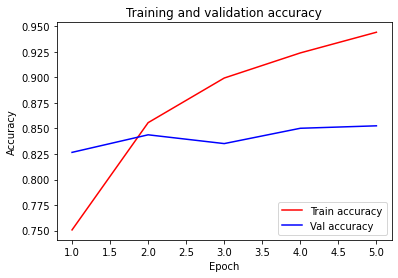

In [ ]:
history_dict = history.history

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

epoch_number = range(1, len(acc) + 1)

plt.plot(epoch_number, acc, 'r', label='Train accuracy')
plt.plot(epoch_number, val_acc, 'b', label='Val accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

When we look at the loss values instead, we see that validation loss actually increases as epochs continue. Given that accuracy is slightly increasing in the validation set, this may still be acceptable. However, this is not the most ideal situation.

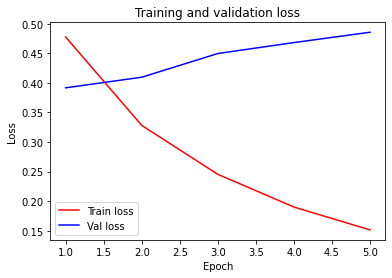

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(epoch_number, loss, 'r', label='Train loss')
plt.plot(epoch_number, val_loss, 'b', label='Val loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Predict on new text
Now that we've tuned the model a bit to our data set, now let's try again with the same sample text that we used earlier (remember 0 is a negative review, 1 is a positive review). You should see some more accuracy compared to our pre-tuned model's performance, especially for less tricky example sentences.

In [ ]:
bert_raw_result = classifier_model(tf.constant(example_text))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.34513733]], shape=(1, 1), dtype=float32)


# Concluding

Natural language processing is a fascinating field which just went through a pretty big revolution with these transformer models. It will be more and more important to get used to them and learn how to use them on your own. It is likely they will be around for a little bit until the next big revolution in the field. For now, it will be exciting to see how BERT and GPT models continue to evolve and capture more understanding of something as complex as human language.

# Flair

Developed by Humboldt University and its partners, Flair is a multipurpose NLP library which can perform tasks such as name entity recognition (NER), part-of-speech taging (PoS), load word embeddings (from GloVe, BERT, ELMo) and incorporate it into PyTorch for learning. You can see their [official page on GitHub here](https://github.com/flairNLP/flair).

In [ ]:
!pip install flair

from flair.models import TextClassifier
from flair.data import Sentence
from flair.data_fetcher import NLPTaskDataFetcher
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentLSTMEmbeddings
from flair.trainers import ModelTrainer
from flair.data import Corpus

from pathlib import Path

import pandas as pd

     |████████████████████████████████| 286kB 4.3MB/s 
     |████████████████████████████████| 983kB 35.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 798kB 34.2MB/s 
     |████████████████████████████████| 1.2MB 35.1MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 19.7MB 1.3MB/s 
     |████████████████████████████████| 2.5MB 25.9MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 901kB 32.3MB/s 
     |████████████████████████████████| 3.3MB 29.0MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9705 sha256=de7b705d1bd55870ac9643aae85a27033d786f2c9e0898b67c24c4c8deab1b8a
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Created wheel for langdetect: file

As an example, let's load the text classifier on English sentiment and try out our sample sentence. You can type out any sentence that you want. Did flair correctly identify the sentiment? 

In [ ]:
classifier = TextClassifier.loadted every minute of it('en-sentiment')

example_text = ['hated every minute of it']
sentence = Sentence(example_text)

classifier.predict(sentence)

print(f'The example sentence is: {sentence.labels}')

2021-06-24 11:03:11,798 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt
The example sentence is: [NEGATIVE (1.0)]


In flair terminology, the corpus is the dataset that will be used to train the model. It is composed of 3 lists:  train sentences, dev (validation) sentences, and test sentences. You must split all of your data into these three sets before the model can begin training. Guidance for 

You can also download full datasets as well. For example, we can download the same dataset as used above by simply calling the following.

In [ ]:
from flair.datasets import IMDB

corpus: Corpus = IMDB()

Secondly, you must get the labels for the model so that they can be used later in training.

In [ ]:
label_dict = corpus.make_label_dictionary()

As mentioned earlier, word embeddings are immensely useful ways to express words in a numerical form for a computer to then use for algorithms. Flair allows many different embeddings for future training. This includes embeddings from GloVe, ELMo and BERT. We can just instantiate the embedding classfor now to be used in the next step. All embeddings are PyTorch vectors, so they can be immediately used for training and fine-tuning. Different options for [word embeddings are on this page](https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_3_WORD_EMBEDDING.md). 



In [ ]:
word_embeddings = [WordEmbeddings('glove')]

We will need to aggregate word embeddings somehow to create a meaning from the document. This is called a document embedding and, like word embeddings, [there are a lot of options offered by the developers of flair as well](https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_5_DOCUMENT_EMBEDDINGS.md). For RNN embeddings, the embedding dimensionality depends on the number of hidden states specified and whether the RNN is bidirectional or not. The documentation contains more specifics. Good to know as well ist that a GRU-type RNN is instantiated with this function.

In [ ]:
document_embeddings = DocumentRNNEmbeddings(word_embeddings, hidden_size=256)

In [ ]:
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

trainer = ModelTrainer(classifier, corpus)

trainer.train('resources/taggers/imdb',
              learning_rate=0.1,
              mini_batch_size=32,
              anneal_factor=0.5,
              patience=5,
              max_epochs=150)

2021-06-24 11:03:23,613 Reading data from .
2021-06-24 11:03:23,614 Train: testimdb.csv
2021-06-24 11:03:23,615 Dev: valimdb.csv
2021-06-24 11:03:23,616 Test: trainimdb.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated function (or staticmethod) load_classification_corpus. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  # Remove the CWD from sys.path while we load stuff.


2021-06-24 11:03:45,086 Reading data from /root/.flair/datasets/imdb_v2-rebalanced
2021-06-24 11:03:45,087 Train: /root/.flair/datasets/imdb_v2-rebalanced/train-all.txt
2021-06-24 11:03:45,088 Dev: None
2021-06-24 11:03:45,094 Test: None
2021-06-24 11:03:48,145 Computing label dictionary. Progress:


100%|██████████| 91000/91000 [10:39<00:00, 142.32it/s]

2021-06-24 11:14:28,029 [b'POSITIVE', b'NEGATIVE']


2021-06-24 11:14:29,251 ----------------------------------------------------------------------------------------------------
2021-06-24 11:14:29,252 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
    )
    (word_reprojection_map): Linear(in_features=100, out_features=100, bias=True)
    (rnn): GRU(100, 256, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=256, out_features=2, bias=True)
  (loss_function): CrossEntropyLoss()
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2021-06-24 11:14:29,254 ----------------------------------------------------------------------------------------------------
2021-06-24 11:14:29,256 Corpus: "Corpus: 81000 train + 9000 dev + 10000 test sentences"
2021-06-24 11:14:29,259 ----------------------------------------------------------------------------------------------------
2021-06-24 11:

In [ ]:
sentence = "I don't think it was the best movie ever but I liked it"
classifier.predict(sentence)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
imdb = pd.read_csv('/content/drive/My Drive/IMDB Dataset.csv', header=0)
imdb["label"] = (imdb["sentiment"]=="positive").astype(int)
imdb.drop("sentiment", axis=1, inplace=True)
train, val, test = np.split(imdb.sample(frac=1), [int(.6*len(imdb)), int(.8*len(imdb))])